# Python для анализа данных

*Алла Тамбовцева, НИУ ВШЭ*

дополнения: *Ян Пиле, НИУ ВШЭ*

Посмотрим на другие примеры использования `selenium`. 

**Пример.** Зайдем на сайт книжного магазина и найдем все книги про Python. Загрузим библиотеку, веб-драйвер и откроем страницу в браузере через Python.

In [7]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
br = webdriver.Chrome(ChromeDriverManager().install())

# открываем страницу в Chrome в автоматическом режиме
br.get("http://www.biblio-globus.ru/")



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [/Users/a18509896/.wdm/drivers/chromedriver/mac64/91.0.4472.101/chromedriver] found in cache


Найдем с помощью CSS Selector'а (*SelectorGadget*) поле для ввода названия книги или автора. 

In [2]:
field = br.find_element_by_css_selector("input")

Сохраним запрос:

In [3]:
author = "Python"  # переменная author - условность

Введем запрос в поле для поиска (`.send_keys`) и подождем чуть-чуть:

In [4]:
field.send_keys(author)
br.implicitly_wait(2)  # подождем пару секунд

Теперь найдем кнопку для поиска (значок *лупа* рядом со строкой поиска) через CSS Selector:

In [5]:
# #search_submit
submit = br.find_element_by_css_selector("#search_submit")

Кликнем на нее:

In [6]:
submit.click()

Сохраним первую страницу с результатами в переменную `page1`.

In [7]:
page1 = br.page_source

In [8]:
page1

'<html xmlns="http://www.w3.org/1999/xhtml"><head><title>\n\t\n\tРезультаты поиска по запросу: «Python»\n\n</title><meta http-equiv="Content-Type" content="application/xhtml+xml; charset=utf-8"><meta name="description"><meta name="keywords"><meta name="robots">\n\t<link rel="stylesheet" type="text/css" href="/search/Content/Site.css?v=77" media="screen">\n    <link rel="stylesheet" type="text/css" href="/search/Content/jquery-ui-1.8.16.custom.css" media="screen">\n    <link rel="stylesheet" href="https://use.fontawesome.com/releases/v5.7.0/css/all.css" integrity="sha384-lZN37f5QGtY3VHgisS14W3ExzMWZxybE1SJSEsQp9S+oqd12jhcu+A56Ebc1zFSJ" crossorigin="anonymous">\n    <link rel="stylesheet" type="text/css" href="/search/Content/eventCalendar_theme_responsive.css" media="screen">\n    <link rel="stylesheet" type="text/css" href="/search/Content/eventCalendar.css" media="screen">\n    <link rel="stylesheet" href="/search/Content/owl/assets/owl.carousel.css">\n    <link rel="stylesheet" href=

Теперь обработаем эту страницу через `BeautifulSoup`:

In [9]:
from bs4 import BeautifulSoup

In [10]:
soup1 = BeautifulSoup(page1, 'lxml')

Найдем все названия книг на этой странице. По исходному коду можно увидеть, что они имеют тэг `a` с атрибутом `class`, равным `name`:

In [11]:
soup1.find_all('a', {'class':'name'})

[<a class="name" href="/search/catalog/details/10773052">Для начинающих. Python, Django и PyCharm для начинающих.</a>,
 <a class="name" href="/search/catalog/details/10771976">Основы искусственного интеллекта в примерах на Python</a>,
 <a class="name" href="/search/catalog/details/10726773">Папка на молнии пластиковая с ручками ErichKrause® Crimson Python, А4+ (в пакете по 4 шт.)</a>,
 <a class="name" href="/search/catalog/details/10597875">Изучаем Python, том 1</a>,
 <a class="name" href="/search/catalog/details/10548788">Python : Карманный справочник</a>,
 <a class="name" href="/search/catalog/details/10632642">Изучаем Python, том 2,</a>,
 <a class="name" href="/search/catalog/details/10764243">Обработка естественного языка. Python и spaCy на практике</a>,
 <a class="name" href="/search/catalog/details/10590845">Машинное обучение с использованием Python. Сборник рецептов</a>,
 <a class="name" href="/search/catalog/details/10754289">Python: быстрый старт</a>,
 <a class="name" href="/s

С помощью списковых включений выберем из ссылок с тэгом `<a>` текст (так мы уже делали, и не раз).

In [12]:
a = []
for tag in soup1.find_all('a', {'class':'name'}):
    a.append(tag.text)

In [14]:
books1 = [b.text for b in soup1.find_all('a', {'class':'name'})]

In [15]:
books1

['Для начинающих. Python, Django и PyCharm для начинающих.',
 'Основы искусственного интеллекта в примерах на Python',
 'Папка на молнии пластиковая с ручками ErichKrause® Crimson Python, А4+ (в пакете по 4 шт.)',
 'Изучаем Python, том 1',
 'Python : Карманный справочник',
 'Изучаем Python, том 2,',
 'Обработка естественного языка. Python и spaCy на практике',
 'Машинное обучение с использованием Python. Сборник рецептов',
 'Python: быстрый старт',
 'Основы Python. Научитесь думать как программист']

Теперь аналогичным образом сгрузим информацию об авторах:

In [16]:
authors1 = [a.text for a in soup1.find_all('div', {'class': 'author'})]

Сгрузим расположение:

In [17]:
place1 = [p.text for p in soup1.find_all('div', {'class':'placement'})]

In [18]:
place1

['Расположение в торговом зале: Уровень 1, зал № 07, секция 08, шкаф 76, полка 07',
 'Расположение в торговом зале: Уровень 1, зал № 07, секция 08, шкаф 76, полка 05',
 'Расположение в торговом зале: Уровень 1, зал № 09, секция 03, шкаф 12, полка 02',
 'Расположение в торговом зале: Уровень 1, зал № 07, секция 08, шкаф 76, полка 01',
 'Расположение в торговом зале: Уровень 1, зал № 07, секция 08, шкаф 76, полка 05',
 'Расположение в торговом зале: Уровень 1, зал № 07, секция 08, шкаф 76, полка 01',
 'Расположение в торговом зале: Уровень 1, зал № 07, секция 08, шкаф 76, полка 06',
 'Расположение в торговом зале: Уровень 1, зал № 07, секция 08, шкаф 85, полка 05',
 'Расположение в торговом зале: Уровень 1, зал № 07, секция 08, шкаф 76, полка 06',
 'Расположение в торговом зале: Уровень 1, зал № 07, секция 08, шкаф 76, полка 06']

И, конечно, цену:

In [19]:
price1 = [p.text for p in soup1.find_all('div', 
                                         {'class':'title_data price'})]

In [20]:
price1

['Цена: 1019,00 руб.',
 'Цена: 1099,00 руб.',
 'Цена: 319,00 руб.',
 'Цена: 2849,00 руб.',
 'Цена: 689,00 руб.',
 'Цена: 2849,00 руб.',
 'Цена: 1489,00 руб.',
 'Цена: 1009,00 руб.',
 'Цена: 979,00 руб.',
 'Цена: 1139,00 руб.']

Осталось пройтись по всем страницам, которые были выданы в результате поиска. Для примера перейдем на страницу 2 и на этом остановимся.

In [21]:
next_p = br.find_element_by_css_selector('.next_page')

In [22]:
next_p.click()

Проделаем то же самое, что и с первой страницей. По-хорошему нужно написать функцию, которая будет искать на странице названия книг, их расположение и цену. Но оставим это в качестве задания читателю :)

In [23]:
page2 = br.page_source
soup2 = BeautifulSoup(page2, 'lxml')
books2 = [b.text for b in soup2.find_all('a', {'class':'name'})]
author2 = [a.text for a in soup2.find_all('div', {'class': 'author'})]
place2 = [p.text for p in soup2.find_all('div', {'class':'placement'})]
price2 = [p.text for p in soup2.find_all('div', {'class':'title_data price'})]

Расширим списки результатов с первой страницы данными, полученными со второй страницы, используя метод `.extend()`.

In [24]:
books1.extend(books2)
authors1.extend(books2)
place1.extend(place2)
price1.extend(price2)

Осталось импортировать библиотеку `pandas` и создать датафрейм.

In [25]:
import pandas as pd

Для разнообразия создадим датафрейм не из списка списков, а из словаря. Ключами словаря будут названия столбцов в таблице, а значениями – списки с сохраненной информацией (названия книг, цены и проч.).

In [26]:
df = pd.DataFrame({'book': books1, 'author': authors1,
                   'placement': place1, 'price': price1})

In [28]:
df.head()

,book,author,placement,price
0,"Для начинающих. Python, Django и PyCharm для н...",А. В. Постолит,"Расположение в торговом зале: Уровень 1, зал №...","Цена: 1019,00 руб."
1,Основы искусственного интеллекта в примерах на...,А. В. Постолит,"Расположение в торговом зале: Уровень 1, зал №...","Цена: 1099,00 руб."
2,Папка на молнии пластиковая с ручками ErichKra...,,"Расположение в торговом зале: Уровень 1, зал №...","Цена: 319,00 руб."
3,"Изучаем Python, том 1",М. Лутц,"Расположение в торговом зале: Уровень 1, зал №...","Цена: 2849,00 руб."
4,Python : Карманный справочник,М. Лутц,"Расположение в торговом зале: Уровень 1, зал №...","Цена: 689,00 руб."


Давайте приведем столбец с ценой к числовому типу. Уберем слова *Цена* и *руб*, а потом сконвертируем строки в числа с плавающей точкой. Напишем функцию `get_price()`,

In [33]:
float(df['price'][0].split()[1].replace(',', '.'))

1019.0

In [40]:
def get_price(price):
    book_price = price.split(' ')[1]  # разобьем строку по пробелу и возьмем второй элемент
    book_price = book_price.replace(',', '.')  # заменим запятую на точку
    price_num = float(book_price)  # сконвертируем в float
    return price_num

In [41]:
import re
def preis(x):
    return float('.'.join(re.findall(r'\d+',x)))

In [42]:
# проверка
get_price(df.price[0])

1019.0

In [43]:
preis(df.price[0])

1019.0

Всё отлично работает! Применим функцию к столбцу *price* и создадим новый столбец *nprice*.

In [44]:
df['nprice'] = df.price.apply(preis)

In [45]:
df.head()

,book,author,placement,price,nprice
0,"Для начинающих. Python, Django и PyCharm для н...",А. В. Постолит,"Расположение в торговом зале: Уровень 1, зал №...","Цена: 1019,00 руб.",1019.0
1,Основы искусственного интеллекта в примерах на...,А. В. Постолит,"Расположение в торговом зале: Уровень 1, зал №...","Цена: 1099,00 руб.",1099.0
2,Папка на молнии пластиковая с ручками ErichKra...,,"Расположение в торговом зале: Уровень 1, зал №...","Цена: 319,00 руб.",319.0
3,"Изучаем Python, том 1",М. Лутц,"Расположение в торговом зале: Уровень 1, зал №...","Цена: 2849,00 руб.",2849.0
4,Python : Карманный справочник,М. Лутц,"Расположение в торговом зале: Уровень 1, зал №...","Цена: 689,00 руб.",689.0


In [48]:
df.shape

(20, 5)

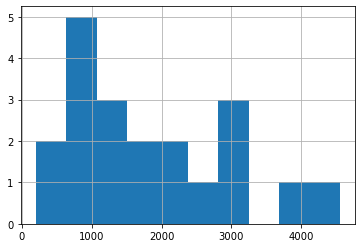

In [47]:
df.nprice.hist();

Теперь можем расположить книги по цене в порядке возрастания:

In [49]:
df.sort_values('nprice', ascending=False)

,book,author,placement,price,nprice
18,Python для финансовых расчетов,Python для финансовых расчетов,"Расположение в торговом зале: Уровень 1, зал №...","Цена: 4559,00 руб.",4559.0
17,Научное программирование на Python,Научное программирование на Python,"Расположение в торговом зале: Уровень 1, зал №...","Цена: 4079,00 руб.",4079.0
3,"Изучаем Python, том 1",М. Лутц,"Расположение в торговом зале: Уровень 1, зал №...","Цена: 2849,00 руб.",2849.0
5,"Изучаем Python, том 2,",М.Лутц,"Расположение в торговом зале: Уровень 1, зал №...","Цена: 2849,00 руб.",2849.0
15,Введение в машинное обучение с помощью Python,Введение в машинное обучение с помощью Python,"Расположение в торговом зале: Уровень 1, зал №...","Цена: 2849,00 руб.",2849.0
16,Python. Лучшие практики и инструменты,Python. Лучшие практики и инструменты,"Расположение в торговом зале: Уровень 1, зал №...","Цена: 2679,00 руб.",2679.0
19,Современный скрапинг веб-сайтов с помощью Pyth...,Современный скрапинг веб-сайтов с помощью Pyth...,"Расположение в торговом зале: Уровень 1, зал №...","Цена: 2139,00 руб.",2139.0
11,Простой Python. Современный стиль программиров...,Простой Python. Современный стиль программиров...,"Расположение в торговом зале: Уровень 1, зал №...","Цена: 1959,00 руб.",1959.0
14,"Изучаем Python: программирование игр, визуализ...","Изучаем Python: программирование игр, визуализ...","Расположение в торговом зале: Уровень 1, зал №...","Цена: 1589,00 руб.",1589.0
10,Python. Сборник упражнений,Python. Сборник упражнений,"Расположение в торговом зале: Уровень 1, зал №...","Цена: 1529,00 руб.",1529.0


И сохраним всю таблицу в csv-файл:

In [50]:
df.to_csv("books.csv", index=False)

## Задание

* http://www.biblio-globus.ru/
* Нажать на кнопку "Книги"
* Выбрать любую категорию
* Собрать книги с 2 страниц

In [3]:
from bs4 import BeautifulSoup

In [8]:
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [/Users/a18509896/.wdm/drivers/chromedriver/mac64/91.0.4472.101/chromedriver] found in cache


In [9]:
driver.get("http://www.biblio-globus.ru/")
driver.find_element_by_xpath('//*[@id="TableMRight"]/tbody/tr/td/table/tbody/tr[2]/td[2]/a').click()
driver.find_element_by_xpath('/html/body/table/tbody/tr[2]/td[2]/div/div[2]/div[1]/div/ul/li/ul/li[3]/ul/li[5]/a').click()

page = driver.page_source

In [10]:
soup = BeautifulSoup(page, 'html')
books_on_page = soup.find_all('div', {'class':'details_1'})
books = []

authors = [a.text for a in books_on_page.find_all('div', {'class':'author'})[:2]]

AttributeError: ResultSet object has no attribute 'find_all'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [12]:
len(books_on_page)

12